### **Goal**
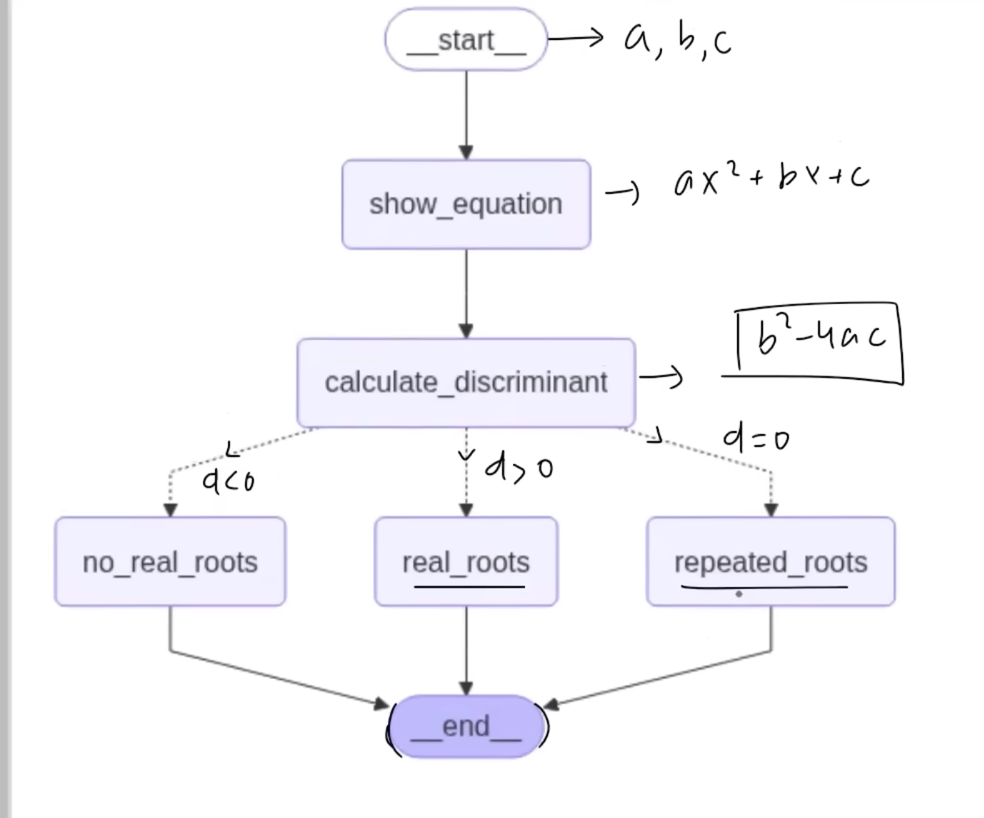

In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [24]:
class QuadState(TypedDict):

    a : int
    b : int
    c : int
    equation: str
    discriminant: float
    result: str

In [25]:
def show_equation(state: QuadState):
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"

    return {"equation": equation}

In [26]:
def calculate_discriminant(state: QuadState):
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = b**2 - 4*a*c
    return {"discriminant": discriminant}

In [27]:
def real_roots(state: QuadState):
    a = state['a']
    b = state['b']
    discriminant = state['discriminant']
    root1 = (-b + discriminant**0.5) / (2*a)
    root2 = (-b - discriminant**0.5) / (2*a)
    result = f"The equation has two real roots: {root1} and {root2}"
    return {"result": result}

In [28]:
def repeated_real_root(state: QuadState):
    a = state['a']
    b = state['b']
    root = -b / (2*a)
    result = f"The equation has one repeated real root: {root}"
    return {"result": result}

In [29]:
def no_real_roots(state: QuadState):
    result = "The equation has no real roots."
    return {"result": result}

**ROunting FUntion**

In [30]:
def check_condition(state: QuadState) -> Literal['real_roots', 'repeated_real_root', 'no_real_roots']:
    discriminant = state['discriminant']
    if discriminant > 0:
        return 'real_roots'
    elif discriminant == 0:
        return 'repeated_real_root'
    else:
        return 'no_real_roots'

In [31]:
graph = StateGraph(QuadState)

graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_real_root", repeated_real_root)
graph.add_node("no_real_roots", no_real_roots)

graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")

graph.add_conditional_edges("calculate_discriminant", check_condition)

graph.add_edge("real_roots", END)
graph.add_edge("repeated_real_root", END) 
graph.add_edge("no_real_roots", END)


workflow = graph.compile()

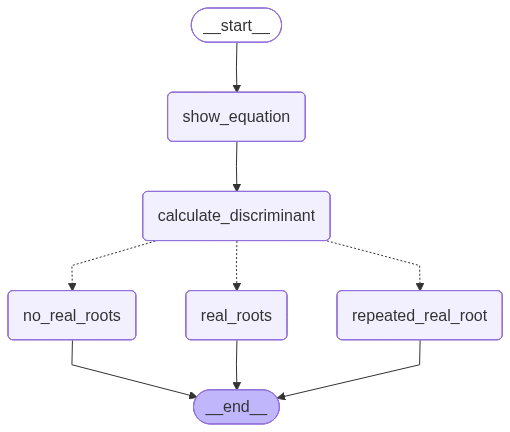

In [32]:
workflow

In [34]:
initial_state = {
  "a":4,
  "b":2,
  "c":4
}

workflow.invoke(initial_state)

{'a': 4,
 'b': 2,
 'c': 4,
 'equation': '4x^2 + 2x + 4 = 0',
 'discriminant': -60,
 'result': 'The equation has no real roots.'}